In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_helper = pd.read_csv('helper.csv', index_col=[0])

In [3]:
df_helper.head(5)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount
0,67203,9.92,126817,19649,207436,9103
1,33583,9.93,68880,4442,52340,2890
2,26578,9.94,46558,2799,58784,3905
3,28086,9.96,60027,3870,66562,3057
4,18451,9.93,31936,3235,51215,4162


In [4]:
# 칼럼 제너레이터 펑션 모음

def pathyTotalCountGen(df):
  df['pathyTotalCount'] = df['sympathyCount'] + df['antipathyCount']
  display(df.head(1))

def antiOverPathyTotalGen(df):
  df['antiOverPathyTotal'] = df['antipathyCount'] / df['pathyTotalCount']
  display(df.head(1))

In [5]:
pathyTotalCountGen(df_helper)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount
0,67203,9.92,126817,19649,207436,9103,216539


In [6]:
antiOverPathyTotalGen(df_helper)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount,antiOverPathyTotal
0,67203,9.92,126817,19649,207436,9103,216539,0.042039


In [7]:
df_helper['antiOverPathyTotal'] = df_helper['antiOverPathyTotal'].round(3) # * 100
# df_helper['antiOverPathyTotal'] = df_helper['antiOverPathyTotal'].astype(int)
# df_helper.rename(columns = {'antiOverSym': 'antiOverSymPerc'}, inplace=True)

In [8]:
df_helper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likeItCount          297 non-null    int64  
 1   topPointTotalNumber  297 non-null    float64
 2   topTotalStarPoint    297 non-null    int64  
 3   commentCount         297 non-null    int64  
 4   sympathyCount        297 non-null    int64  
 5   antipathyCount       297 non-null    int64  
 6   pathyTotalCount      297 non-null    int64  
 7   antiOverPathyTotal   297 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 20.9 KB


In [9]:
sns.set(rc = {'figure.figsize':(18,6)})

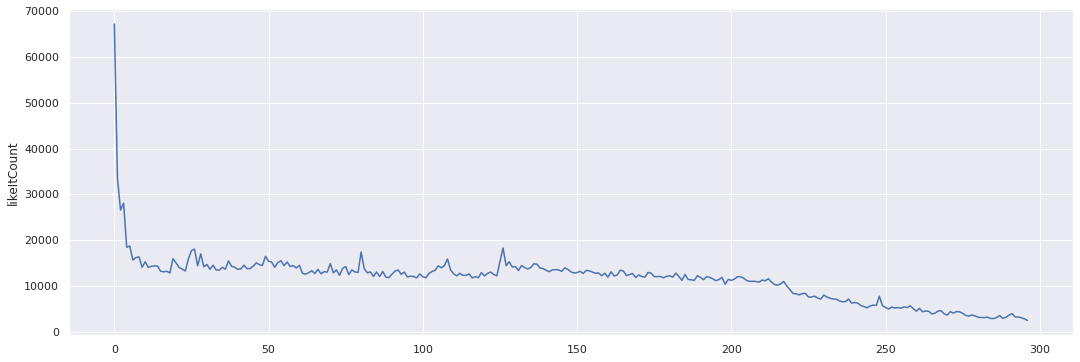

In [10]:
sns.lineplot(data=df_helper.likeItCount)

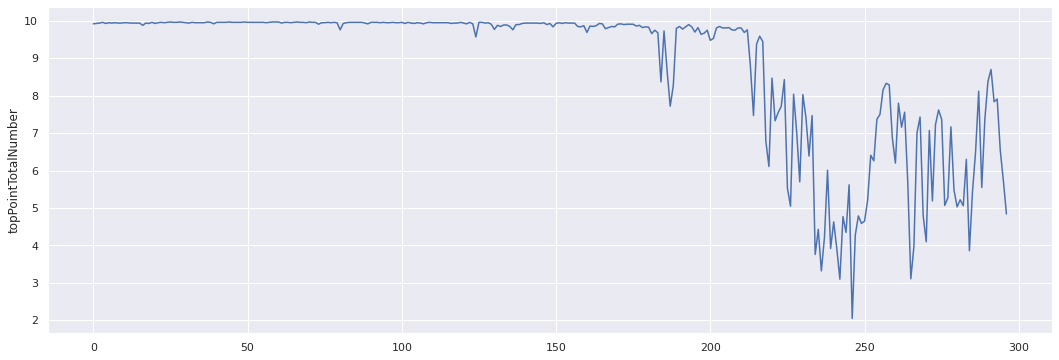

In [11]:
sns.lineplot(data=df_helper.topPointTotalNumber)

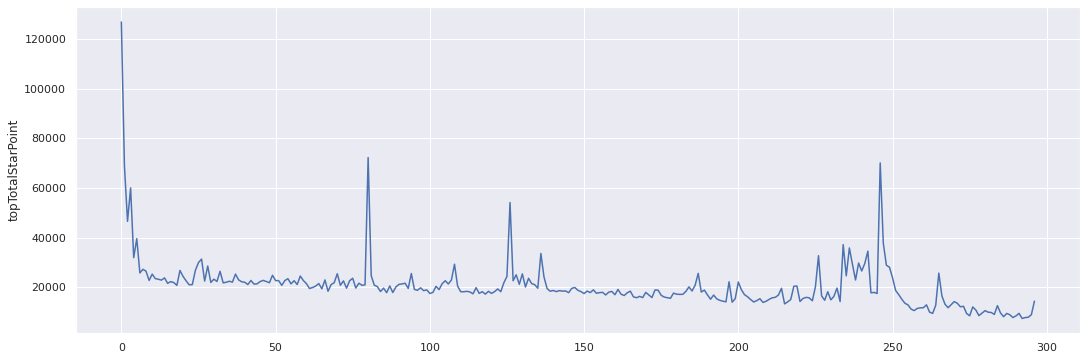

In [12]:
sns.lineplot(data=df_helper.topTotalStarPoint)

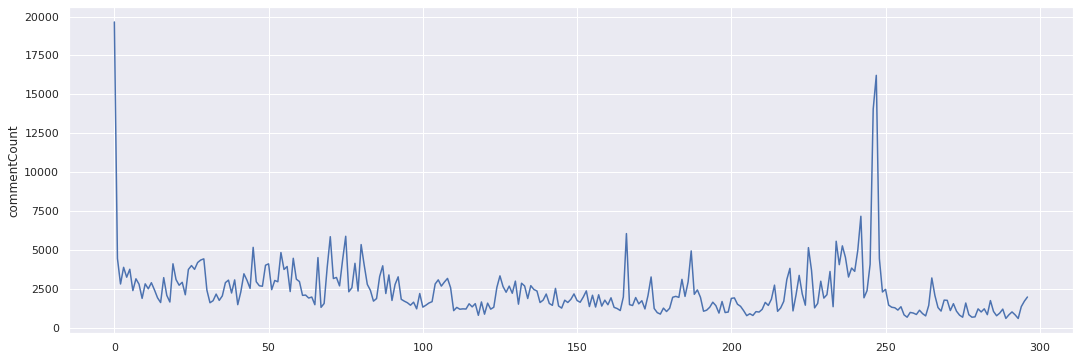

In [13]:
sns.lineplot(data=df_helper.commentCount)

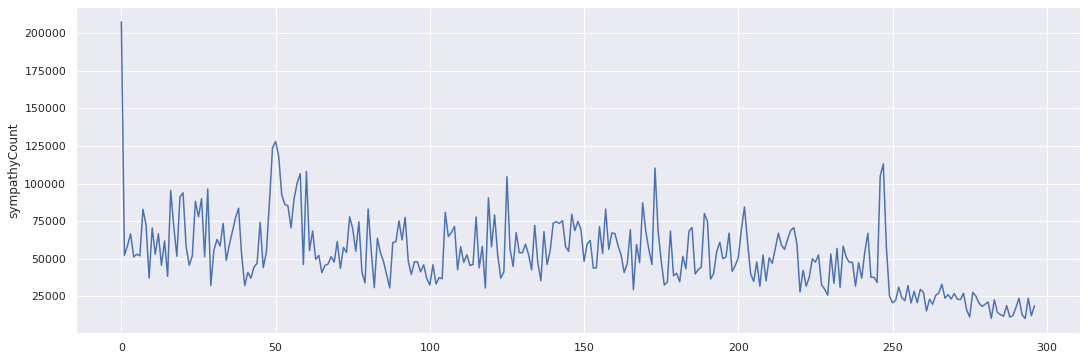

In [14]:
sns.lineplot(data=df_helper.sympathyCount)

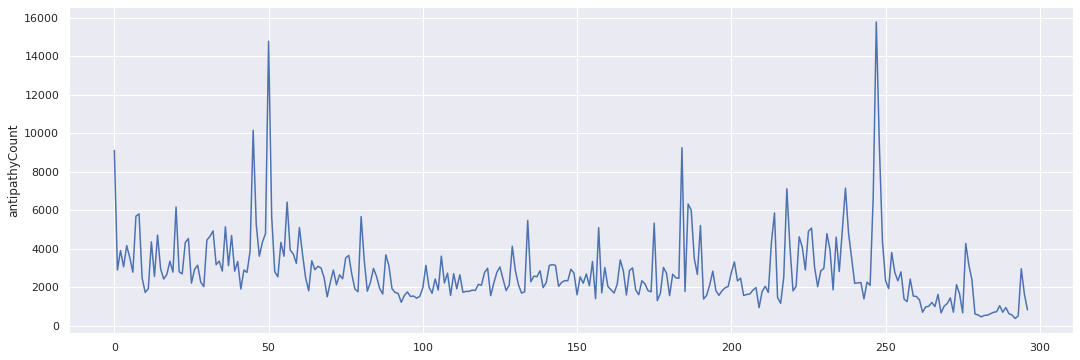

In [15]:
sns.lineplot(data=df_helper.antipathyCount)

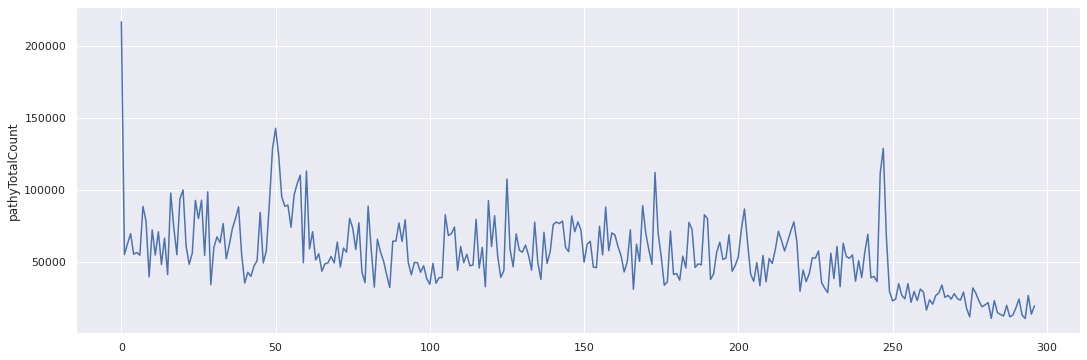

In [16]:
sns.lineplot(data=df_helper.pathyTotalCount)

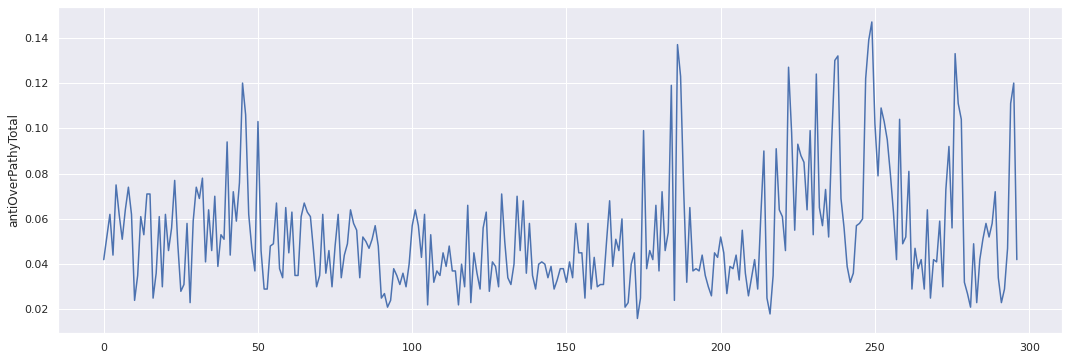

In [17]:
sns.lineplot(data=df_helper.antiOverPathyTotal)

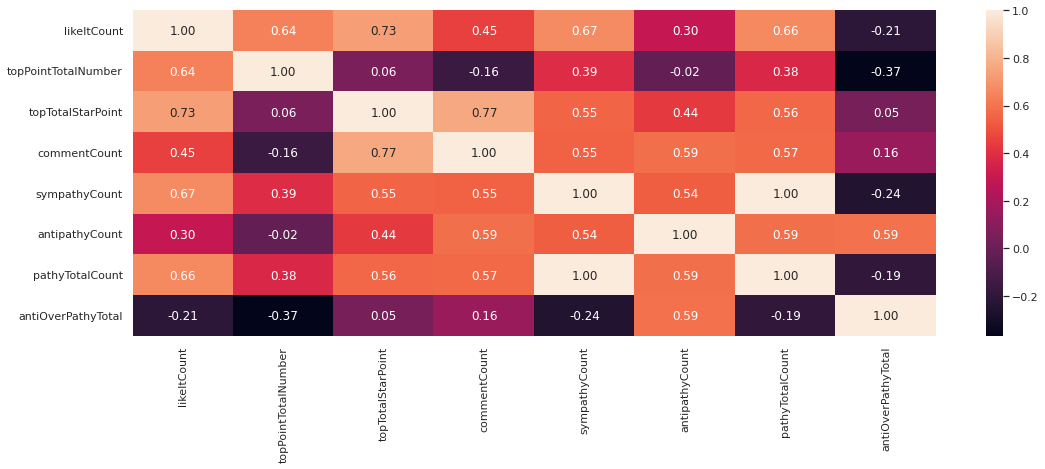

In [18]:
sns.heatmap(data=df_helper.corr(), annot=True, fmt='.2f')

In [19]:
# normalization_df = (df - df.mean())/df.std()
# normalization_df.head()

In [20]:
# df_1 = df_helper[:]
# df_1 = (df_1 - df_1.mean())/df_1.std()
# sns.heatmap(data=df_1.corr(), annot=True)

In [21]:
# 웹툰의 베스트 댓글의 비공감수 총합:공감수 총합 비율이 높아질 수록 웹툰의 평점은 낮아진다.

In [22]:
# 웹툰의 회차별 비공감-공감 비율을 정수형 퍼센트로 바꿔 유니크값을 추려냄
len(df_helper['antiOverPathyTotal'].unique())

91

In [23]:
# normalized_df=(df-df.mean())/df.std()
# normalized_df=(df-df.min())/(df.max()-df.min())

pathyStarPointRelation = df_helper.groupby('antiOverPathyTotal')['topPointTotalNumber'].mean()
nor_pathyStarPointRelation = (pathyStarPointRelation-pathyStarPointRelation.min())/(pathyStarPointRelation.max()-pathyStarPointRelation.min())
pathyStarPointCount = df_helper.groupby('antiOverPathyTotal')['topPointTotalNumber'].count()
nor_pathyStarPointCount = (pathyStarPointCount-pathyStarPointCount.min())/(pathyStarPointCount.max()-pathyStarPointCount.min())

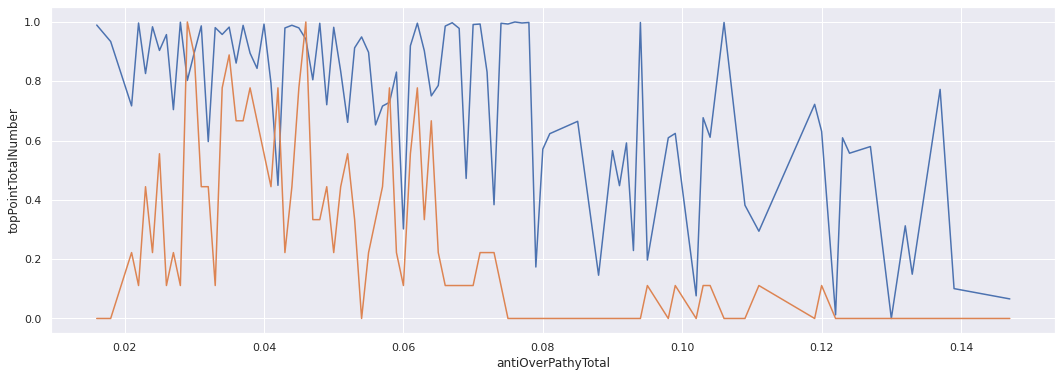

In [24]:
# plt.figure()
sns.lineplot(data=nor_pathyStarPointRelation)
# plt.figure()
sns.lineplot(data=nor_pathyStarPointCount)
# sns.lineplot(data=pathyStarPointCount)

In [25]:
# aa = df_helper['antiOverSym'] == 17
# df_helper[aa]

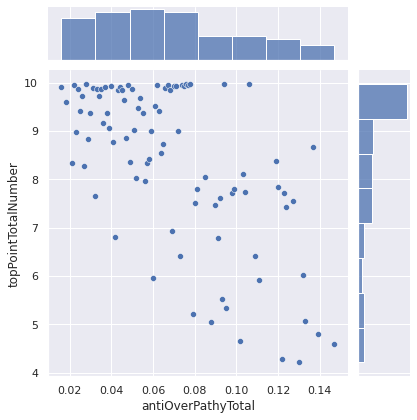

In [26]:
sns.jointplot(data=pathyStarPointRelation, kind='scatter')

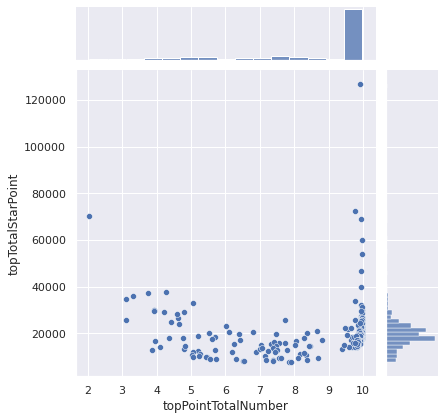

In [27]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.topTotalStarPoint, kind='scatter')

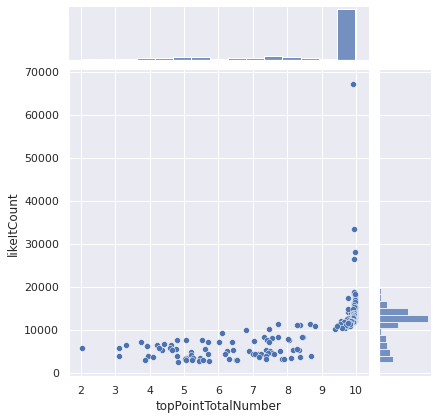

In [28]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.likeItCount, kind='scatter')

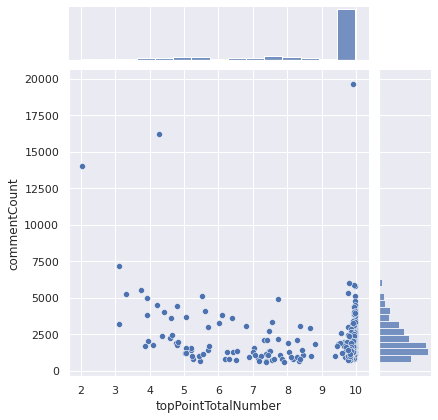

In [29]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.commentCount, kind='scatter')

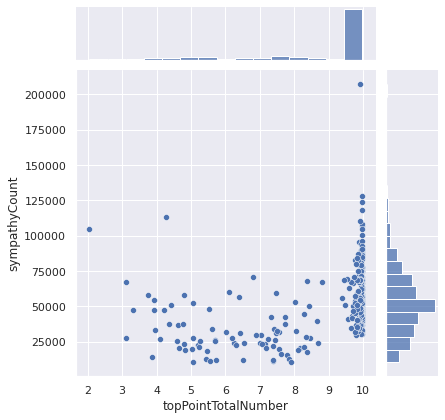

In [30]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.sympathyCount, kind='scatter')

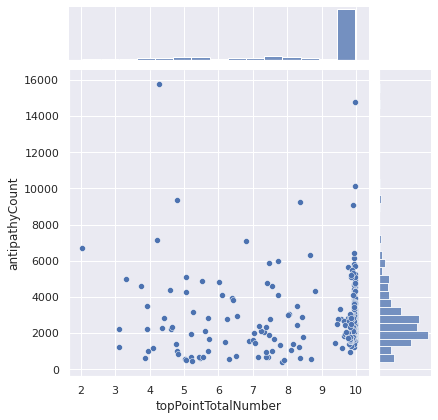

In [31]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.antipathyCount, kind='scatter')

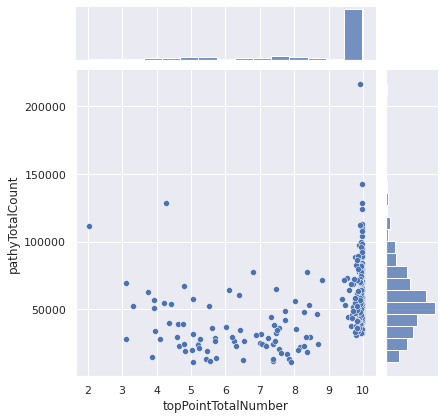

In [32]:
sns.jointplot(x=df_helper.topPointTotalNumber, y=df_helper.pathyTotalCount, kind='scatter')

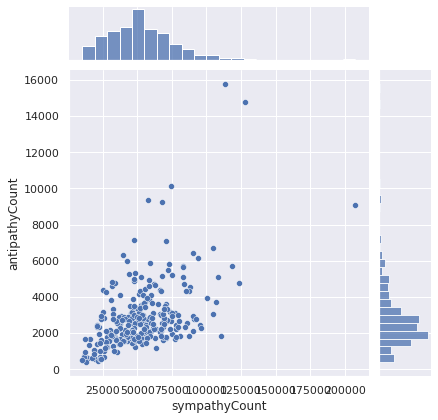

In [33]:
sns.jointplot(x=df_helper.sympathyCount, y=df_helper.antipathyCount, kind='scatter')

In [34]:
df_helper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likeItCount          297 non-null    int64  
 1   topPointTotalNumber  297 non-null    float64
 2   topTotalStarPoint    297 non-null    int64  
 3   commentCount         297 non-null    int64  
 4   sympathyCount        297 non-null    int64  
 5   antipathyCount       297 non-null    int64  
 6   pathyTotalCount      297 non-null    int64  
 7   antiOverPathyTotal   297 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 29.0 KB
